In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load JSON file containing annotations
with open('E:\Amir\EWTracker\dataset_labels.json', 'r') as json_file:
    dataset_labels = json.load(json_file)

# Iterate over images
for image_data in dataset_labels['images']:
    # Load image
    image_path = image_data[r'E:\Amir\EWTracker\dataset_cropped\frame0_TL.jpg']
    image = Image.open(image_path)

    # Create figure and axes for visualization
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Get annotations for the current image
    image_id = image_data['id']
    annotations = [annotation for annotation in dataset_labels['annotations'] if annotation['image_id'] == image_id]

    # Iterate over bounding box annotations
    for annotation in annotations:
        # Extract bounding box coordinates
        x, y, width, height = annotation['bbox']

        # Create a rectangle patch for visualization
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle patch to the axes
        ax.add_patch(rect)

    # Display the image with overlaid bounding boxes
    plt.show()


In [ ]:

import json
from PIL import Image
import matplotlib.pyplot as plt

# Load JSON file
with open('dataset_labels.json') as json_file:
    dataset_labels = json.load(json_file)

# Iterate over images
for image_data in dataset_labels['images']:
    # Load image
    image_path = r'E:\Amir\EWTracker\dataset_cropped\frame0_TL.jpg'
    image = Image.open(image_path)

    # Get image dimensions
    image_width = image_data['width']
    image_height = image_data['height']

    # Create figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Iterate over annotations for the current image
    for annotation in dataset_labels['annotations']:
        if annotation['image_id'] == image_data['id']:
            # Get bounding box coordinates
            bbox = annotation['bbox']
            xmin, ymin, width, height = bbox

            # Convert bounding box to (xmin, ymin, xmax, ymax)
            xmax = xmin + width
            ymax = ymin + height

            # Normalize bounding box coordinates
            xmin /= image_width
            xmax /= image_width
            ymin /= image_height
            ymax /= image_height

            # Add bounding box rectangle to the plot
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='r')
            ax.add_patch(rect)

    # Show the plot
    plt.show()


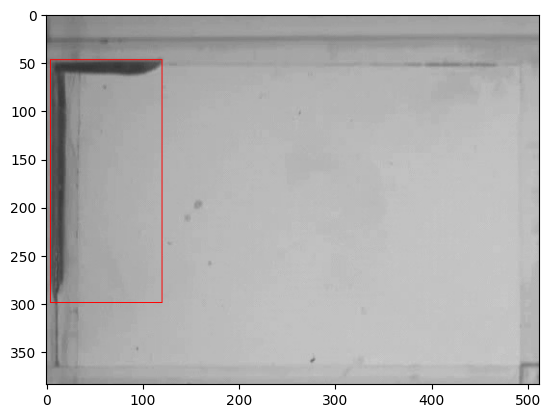

In [71]:
import json
from PIL import Image, ImageDraw
import os
from random import randint

def show_img(image_id):
    # Load the JSON file
    json_file = 'dataset_labels.json'  # Replace with the path to your JSON file
    with open(json_file, 'r') as file:
        dataset_labels = json.load(file)

    # Find the annotation corresponding to the specified image ID
    annotation = next((ann for ann in dataset_labels['annotations'] if ann['image_id'] == image_id), None)
    image_name = next((img for img in dataset_labels['images'] if img['id'] == image_id), None)['file_name']
    # Load the image
    image_path = os.path.join(r'E:\Amir\EWTracker\dataset_cropped', image_name)
    image = Image.open(image_path)

    # Create a draw object
    draw = ImageDraw.Draw(image)

    # Retrieve the bounding box coordinates
    bbox = annotation['bbox']
    x, y, width, height = bbox

    # Draw the bounding box on the image
    draw.rectangle([x, y, x + width, y + height], outline='red')

    # Show the image with the bounding box
    plt.imshow(image)

    plt.show()

    return image


img = show_img(randint(0, 200))

In [11]:
img.width, img.height

(512, 384)

In [5]:
import pyperclip

command = "yolo detect train"

data_path = "yolov8\data_custom.yaml"
epochs = 200
imgsz = 512
batch_size = 16
name = "Amir_EWTRACKER"
dfl=4.5
patience = 100

name += f'_is{imgsz}_bs{batch_size}_E{epochs}_dfl{dfl}'

args = [
    f"data={data_path}",
    f"model=yolov8n.pt",
    f"epochs={str(epochs)}",
    f"imgsz={str(imgsz)}",
    f"batch={str(batch_size)}",
    f"name={name}",
    f"dfl={dfl}",
    f"patience={patience}"
]

for arg in args:
    command += f' {arg}'

print(command)
pyperclip.copy(command)


yolo detect train data=yolov8\data_custom.yaml model=yolov8n.pt epochs=200 imgsz=512 batch=16 name=Amir_EWTRACKER_is512_bs16_E200_dfl4.5 dfl=4.5 patience=100


In [8]:
# To  track the training progress
project_name = "Amir_EWTRACKER_is512_bs16_E200_dfl4.5"
ts_command = f"tensorboard --logdir runs/train/{project_name}"

### CLEAN LABELS

In [29]:
import os
from pathlib import Path
from tqdm import tqdm

test_paths= r"E:\Amir\EWTracker\yolov8_for_segmentation\val\labels"

test_file = "frame2222_TL.txt"
test_path = os.path.join(test_paths, test_file)

with open(test_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    print(len(line.split(' ')))

5
5
2
101


In [ ]:
import os
from pathlib import Path
from tqdm import tqdm

test_paths= r"E:\Amir\EWTracker\yolov8_for_segmentation\train\labels"
# test_paths= r"E:\Amir\EWTracker\yolov8_for_segmentation\val\labels"

# del_pattern = "0 \n"

cc = 0

for test_file in tqdm(os.listdir(test_paths)):
    test_path = os.path.join(test_paths, test_file)
    with open(test_path, 'r') as f:
        lines = f.readlines()

    ori_length = len(lines)

    longest_one_index = -1
    longest_length = 0

    for line in lines:
        line_length = len(line.split(' '))
        if line_length > longest_length:
            longest_length = line_length
            longest_one_index = lines.index(line)

    # remove other lines except the longest one
    lines = [lines[longest_one_index]]
    if ori_length > 1 and len(lines) == 1:
        cc += 1
    #     print(f"{Path(test_path).stem} has originally {ori_length} lines, decided to keep index {longest_one_index}, final remains = {len(lines)}")

    if len(lines) != 1:
        print(f"{Path(test_path).stem} healed, but somehow remained {len(lines)}")
        
    # with open(test_path, 'w') as f:
    #     f.writelines(lines)

print("Healed files: ", cc)

In [ ]:
test_paths= r"E:\Amir\EWTracker\yolov8_for_segmentation\train\labels"
# test_paths= r"E:\Amir\EWTracker\yolov8_for_segmentation\val\labels"

# del_pattern = "0 \n"

cc = 0

shorties = []

for test_file in tqdm(os.listdir(test_paths)):
    test_path = os.path.join(test_paths, test_file)
    with open(test_path, 'r') as f:
        lines = f.readlines()

    if len(lines) > 1:
        raise Exception(f"{Path(test_path).stem} has {len(lines)} lines")
    
    if len(lines) == 0:
        raise Exception(f"{Path(test_path).stem} has {len(lines)} lines")
    

    line = lines[0]
    line_length = len(line.split(' '))
    if line_length < 20:
        shorties.append(Path(test_path).stem)

    print(f"{Path(test_path).stem} has {line_length} pixels")

print("Shorties: ", shorties)

In [56]:
def open_anno(txt_file, datatype='train'):
    if datatype=='train':
        txt_path = os.path.join(r"E:\Amir\EWTracker\yolov8_for_segmentation\train\labels", f"{txt_file}.txt")
    elif datatype=='val':
        txt_path = os.path.join(r"E:\Amir\EWTracker\yolov8_for_segmentation\val\labels", f"{txt_file}.txt")
    with open(txt_path, 'r') as f:
        lines = f.readlines()
    print(lines)

open_anno('frame1057_TR', datatype='train')

['0 0.6992 0.8398 0.6953 0.8438 0.6992 0.8438\n']


In [57]:
open_anno('frame420_TL', datatype='train')

['0 0.0156 0.4453 0.0156 0.4688\n']


In [53]:
open_anno('frame495_BR', datatype='train')

['0 0.0000 0.0156 0.0078 0.0156\n']
